In [27]:
import numpy
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

In [24]:
# X represents the size of a tumor in centimeters.
# Note: X has to be reshaped into a column from a row for the LogisticRegression() function to work.
# reshape: -1 means to flatten the array and 1 mean spread data in 1 column only
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
X

array([[3.78],
       [2.44],
       [2.09],
       [0.14],
       [1.72],
       [1.65],
       [4.92],
       [4.37],
       [4.96],
       [4.52],
       [3.69],
       [5.88]])

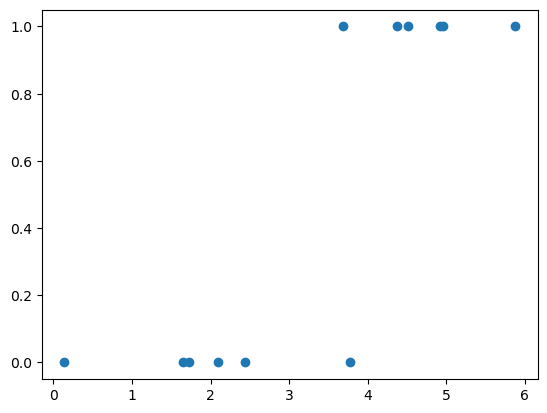

In [28]:
# y represents whether the tumor is cancerous or not (0 for "No", 1 for "Yes").
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

plt.scatter(X, y)

In [33]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [44]:
x = numpy.array([7.46]).reshape(-1,1)
x2 = numpy.array([3.14]).reshape(-1,1)

In [46]:
# predict whether the tumor is cancerous if the size is 3.46mm:
# malignant
log_reg.predict(x)

array([1])

In [49]:
# benign
log_reg.predict(x2)

array([0])

In [53]:
# another example which explains coefficients of logistic regression
# Reshaped for Logistic function.
X_2 = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y_2 = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [61]:
log_reg_2 = LogisticRegression()
log_reg_2.fit(X_2, y_2)

# The coefficient and intercept values can be used to find the probability that each tumor is cancerous.
# This tells us that as the size of a tumor increases by 1mm the odds of it being a cancerous tumor increases by 4x.
log_odds = log_reg_2.coef_
odds = numpy.exp(log_odds)
odds

array([[4.03557295]])

In [68]:
def is_cancerous(logr, x):
    log_odds = logr.coef_ * x + logr.intercept_
    odds = numpy.exp(log_odds)
    probabilities = odds / (odds + 1)

    return probabilities

is_cancerous(log_reg, X_2)

array([[0.60749168],
       [0.19267555],
       [0.12774788],
       [0.00955056],
       [0.08037781],
       [0.0734485 ],
       [0.88362857],
       [0.77901203],
       [0.88924534],
       [0.81293431],
       [0.57718238],
       [0.96664398]])

In [69]:
# x: 3.78, y: 0.61 The probability that a tumor with the size 3.78cm is cancerous is 61%.